In [1]:
%matplotlib inline
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import numpy as np
from torch import nn
from d2l import torch as d2l
from PIL import Image
from sklearn.model_selection import train_test_split

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
img_label = pd.read_csv("../data/classify-leaves/train.csv")
img_label = img_label[img_label.columns[[0, 1]]]

In [3]:
img_label

,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera
...,...,...
18348,images/18348.jpg,aesculus_glabra
18349,images/18349.jpg,liquidambar_styraciflua
18350,images/18350.jpg,cedrus_libani
18351,images/18351.jpg,prunus_pensylvanica


In [4]:
train_img_label, test_img_label = train_test_split(img_label, test_size=0.3, stratify=img_label.iloc[: , 1] )

In [5]:
train_img_label, test_img_label

(                  image                label
 14233  images/14233.jpg          salix_nigra
 7199    images/7199.jpg     quercus_velutina
 3829    images/3829.jpg     acer_platanoides
 14191  images/14191.jpg    sassafras_albidum
 6229    images/6229.jpg   quercus_acutissima
 ...                 ...                  ...
 16943  images/16943.jpg  acer_pseudoplatanus
 11480  images/11480.jpg     pinus_koraiensis
 6714    images/6714.jpg    eucommia_ulmoides
 4279    images/4279.jpg          carya_ovata
 8085    images/8085.jpg       fraxinus_nigra
 
 [12847 rows x 2 columns],
                   image                  label
 1024    images/1024.jpg         abies_concolor
 15115  images/15115.jpg       evodia_daniellii
 8853    images/8853.jpg            morus_rubra
 15229  images/15229.jpg        zelkova_serrata
 18248  images/18248.jpg         abies_concolor
 ...                 ...                    ...
 6917    images/6917.jpg      sassafras_albidum
 6471    images/6471.jpg        til

In [6]:
train_label_list = train_img_label.label.to_list()
test_lable_list = test_img_label.label.to_list()
cnt = {}
# 看看划分的对不对
for label in train_label_list:
    if label in cnt:
        cnt[label][0] += 1
    else:
        cnt[label] = [1, 0]

for label in test_lable_list:
    cnt[label][1] += 1

# 统计之后发现train 与 test确实按照 7：3 分布
cnt

{'salix_nigra': [89, 38],
 'quercus_velutina': [73, 32],
 'acer_platanoides': [53, 23],
 'sassafras_albidum': [48, 21],
 'quercus_acutissima': [71, 31],
 'cercis_canadensis': [101, 43],
 'cryptomeria_japonica': [99, 42],
 'celtis_occidentalis': [48, 21],
 'prunus_pensylvanica': [60, 25],
 'prunus_serotina': [59, 25],
 'ilex_opaca': [119, 51],
 'maclura_pomifera': [247, 106],
 'prunus_sargentii': [146, 63],
 'taxodium_distichum': [76, 32],
 'quercus_nigra': [69, 29],
 'liquidambar_styraciflua': [70, 30],
 'ulmus_pumila': [132, 57],
 'cedrus_deodara': [41, 17],
 'ulmus_rubra': [164, 71],
 'pinus_cembra': [78, 33],
 'celtis_tenuifolia': [58, 25],
 'crataegus_crus-galli': [38, 16],
 'quercus_shumardii': [64, 28],
 'acer_rubrum': [152, 65],
 'pinus_virginiana': [69, 30],
 'abies_concolor': [123, 53],
 'picea_orientalis': [69, 29],
 'crataegus_phaenopyrum': [55, 23],
 'acer_campestre': [56, 24],
 'gleditsia_triacanthos': [90, 38],
 'crataegus_viridis': [69, 30],
 'quercus_marilandica': [76, 

In [7]:
# 分割好的训练集与验证集
train_img_label.to_csv("../data/classify-leaves/split_train.csv", index=False)
test_img_label.to_csv("../data/classify-leaves/split_test.csv", index=False)

In [8]:
data_dir = "../data/classify-leaves"

In [9]:
# 然后应该将训练集与验证集按照不同的类型分别创建文件夹存储不同的树叶
def copyfile(filename, target_dir):
    """将文件复制到目标目录"""
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(filename, target_dir)

def split_train_to_train_valid(data_dir, labels, folder_name):
    for img_dir, label in labels.items():
        copyfile(os.path.join(data_dir, img_dir), 
                os.path.join(data_dir, 'train_valid', folder_name, label))

In [10]:
def split_test_imgs(data_dir):
    with open(os.path.join(data_dir, 'test.csv'), 'r') as f:
        lines = f.readlines()[1:]
    
    for line in lines:
        copyfile(os.path.join(data_dir, line.rstrip()), 
                os.path.join(data_dir, 'train_valid', 'test', 'unknown'))    

In [11]:
train_labels = d2l.read_csv_labels(os.path.join(data_dir, 'split_train.csv'))
test_labels = d2l.read_csv_labels(os.path.join(data_dir, 'split_test.csv'))
all_labels = d2l.read_csv_labels(os.path.join(data_dir, 'train.csv'))

In [12]:
# split_train_to_train_valid(data_dir, train_labels, 'train')
# split_train_to_train_valid(data_dir, test_labels, 'valid')
# split_train_to_train_valid(data_dir, all_labels, 'train_valid')
# split_test_imgs(data_dir)

In [13]:
# 图片大小 (224, 224, 3)
# np.array(Image.open('../data/classify-leaves/images/0.jpg')).shape

In [14]:
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.RandomResizedCrop(224, scale=(0.64, 1.0), ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomRotation(degrees=(90, 180)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [15]:
train_ds, train_valid_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid', folder),
    transform=transform_train) for folder in ['train', 'train_valid']]

valid_ds, test_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid', folder),
    transform=transform_test) for folder in ['valid', 'test']]

In [16]:
batch_size = 128

In [17]:
train_iter, train_valid_iter = [ 
    torch.utils.data.DataLoader(dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in [train_ds, train_valid_ds]]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False, drop_last=True)
test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False, drop_last=False)

In [18]:
net = torchvision.models.resnet18(num_classes=176)
loss = nn.CrossEntropyLoss(reduction='none')

In [19]:
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay):
    # trainer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=wd)
    trainer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), d2l.Timer()
    legend = ['train loss', 'train acc']
    if valid_iter is not None:
        legend.append('test acc')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], legend=legend)
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    
    for epoch in range(num_epochs):
        net.train()
        metric = d2l.Accumulator(3)
        
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = d2l.train_batch_ch13(net, features, labels, loss, trainer, devices)
            metric.add(l, acc, labels.shape[0])
            timer.stop()
            
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, 
                             (metric[0] / metric[2], metric[1] / metric[2], None))
        if valid_iter is not None:
            valid_acc = d2l.evaluate_accuracy_gpu(net, valid_iter)
            animator.add(epoch + 1, (None, None, valid_acc))
        scheduler.step()
    
    measures = (f'train loss {metric[0] / metric[2]:.3f}, '
                f'train acc {metric[1] / metric[2]:.3f}')
    if valid_iter is not None:
        measures += f', valid acc {valid_acc:.3f}'
    print(measures + f'\n{metric[2] * num_epochs / timer.sum():.1f}'
          f' examples/sec on {str(devices)}')

train loss 0.576, train acc 0.811, valid acc 0.703
609.9 examples/sec on [device(type='cuda', index=0)]


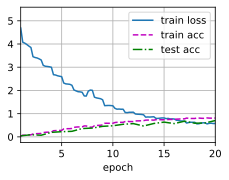

In [20]:
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 20, 2e-3, 5e-4
lr_period, lr_decay = 4, 0.9
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

train loss 0.245, train acc 0.913, valid acc 0.788
613.7 examples/sec on [device(type='cuda', index=0)]


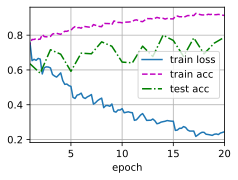

In [21]:
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

train loss 0.117, train acc 0.957, valid acc 0.818
613.0 examples/sec on [device(type='cuda', index=0)]


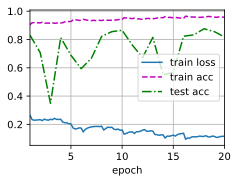

In [26]:
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

train loss 0.085, train acc 0.970, valid acc 0.883
621.5 examples/sec on [device(type='cuda', index=0)]


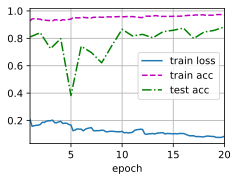

In [27]:
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

train loss 0.067, train acc 0.975, valid acc 0.799
624.0 examples/sec on [device(type='cuda', index=0)]


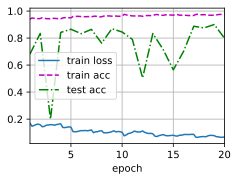

In [28]:
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

train loss 0.054, train acc 0.979, valid acc 0.910
306.6 examples/sec on [device(type='cuda', index=0)]


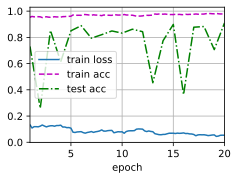

In [30]:
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period, lr_decay)

In [23]:
# batchsize=128 epochs=10 lr=2e-4 train loss 1.168, train acc 0.639, valid acc 0.341
# batchsize=128 epochs=20 lr=2e-3 train loss 0.564, train acc 0.809, valid acc 0.644
# 再训练20个epoch train loss 0.171, train acc 0.939, valid acc 0.821
# 再训练20个epoch train loss 0.079, train acc 0.973, valid acc 0.769
# 再训练20个epoch train loss 0.055, train acc 0.980, valid acc 0.852
# 这里总共用 SGD 训练了80个epoch

# 使用Adam训练
# batchsize=128 epochs=20 lr=2e-3 train loss 0.576, train acc 0.811, valid acc 0.703
# 再训练20个epoch train loss 0.245, train acc 0.913, valid acc 0.788
# 再训练20个epoch train loss 0.158, train acc 0.943, valid acc 0.853
# 再训练20个epoch train loss 0.117, train acc 0.957, valid acc 0.818
# 再训练20个epoch train loss 0.085, train acc 0.970, valid acc 0.883
# 再训练20个epoch train loss 0.067, train acc 0.975, valid acc 0.799
# 再训练20个epoch train loss 0.054, train acc 0.979, valid acc 0.910

In [24]:
# train(net, train_iter, None, num_epochs, lr, wd, devices, lr_period, lr_decay)

In [31]:
preds = []

for X, _ in test_iter:
    y_hat = net(X.to(devices[0]))
    preds.extend(y_hat.argmax(dim=1).type(torch.int32).cpu().numpy())

ids = ['images/' + str(i) + '.jpg' for i in range(18353, 18353 + 8800)]
df = pd.DataFrame({'image': ids, 'label' : preds})
df['label'] = df['label'].apply(lambda x: train_ds.classes[x])
df.to_csv('../data/classify-leaves/submission2.csv', index=False)